In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading and reading the data present in csv format

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Deep Learning Assignment/Copy of behaviour_content_simulation_train.csv")

In [ ]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
df.drop(labels=['id'],axis=1,inplace=True) # id column has no effect on the likes so dropping it from the dataframe

In [ ]:
df.head()

,date,likes,content,username,media,inferred company
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
df.isnull().sum()     # checking for null values in the dataset

date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [ ]:
df.describe()       #Tells about the statistical measures of the numrical data

,likes
count,300000.000000
mean,773.364793
std,4931.463419
min,0.000000
25%,3.000000
50%,76.000000
75%,364.000000
max,560193.000000


# EDA for Text Data present in **'Content'** column

In [ ]:
content_list=' '.join(df['content'].tolist())   # Make a list for the all the words present in the Content column

In [ ]:
len(content_list)

44557408

In [ ]:
content_list[:5000]

'Spend your weekend morning with a Ham, Egg, and Cheese Wrap paired with a sweet Iced French Vanilla! ☀️ Order yours now via dine-in, takeout, and delivery. #TimHortonsPH <hyperlink> Watch rapper <mention> freestyle for over an HOUR <hyperlink> <hyperlink> Canadian Armenian community demands ban on military drone tech exports to Turkey <hyperlink> <hyperlink> 1st in Europe to be devastated by COVID-19, Italy redoubled its efforts, and they\'re now paying off. My latest. 👇🏼👇🏼\n<hyperlink> <hyperlink> Congratulations to Pauletha Butts of <mention>! She was presented a Beyond the Call Award for her leadership and planning last week’s Cultural Diversity Night! #excellenceisworththeeffort <hyperlink> An 85-year-old primary school in Shanghai has been lifted off the ground — in its entirety — and relocated using new technology dubbed the "walking machine." <hyperlink> <hyperlink> LASU Celebrates New Dawn Of Unbroken Peace As Law Faculty Presents Book On Fagbohun <hyperlink> <hyperlink> Next 

In [ ]:
df['content_len']=df['content'].apply(lambda x: len(x))     # Function for length of total characters

In [ ]:
df['word_count']=df['content'].apply(lambda x: len(x.split()))      # Function for total word count for each of them

In [ ]:
def get_avg_word_len(x):                # Function for average word count of each
  words=x.split()
  word_len=0
  for word in words:
    word_len=word_len + len(word)

  return word_len/len(words)

In [ ]:
df['avg_word_len']=df['content'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.head()

,date,likes,content,username,media,inferred company,content_len,word_count,avg_word_len
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,181,29,5.275862
1,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,73,10,6.400000
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,104,14,6.500000
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,140,22,5.409091
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,199,26,6.692308


In [ ]:
df.describe()

,likes,content_len,word_count,avg_word_len
count,300000.000000,300000.000000,300000.000000,300000.000000
mean,773.364793,147.524697,22.467470,5.823112
std,4931.463419,71.517556,11.813077,0.978138
min,0.000000,20.000000,2.000000,1.307692
25%,3.000000,88.000000,12.000000,5.150000
50%,76.000000,136.000000,21.000000,5.687500
75%,364.000000,201.000000,31.000000,6.352941
max,560193.000000,540.000000,64.000000,45.250000


## Plots for numerical data

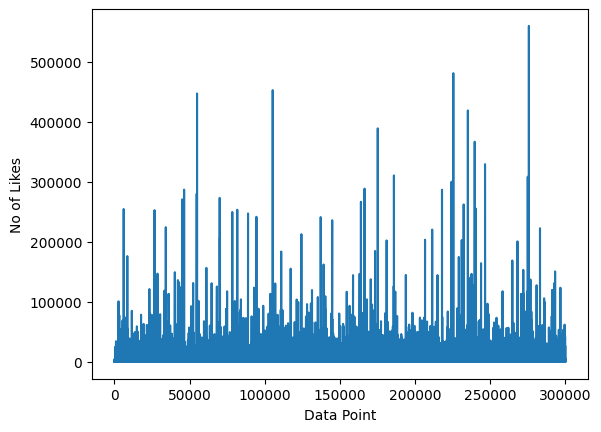

In [ ]:
df['likes'].plot(kind='line',xlabel='Data Point',ylabel='No of Likes');     # Provides likes count for each data point present

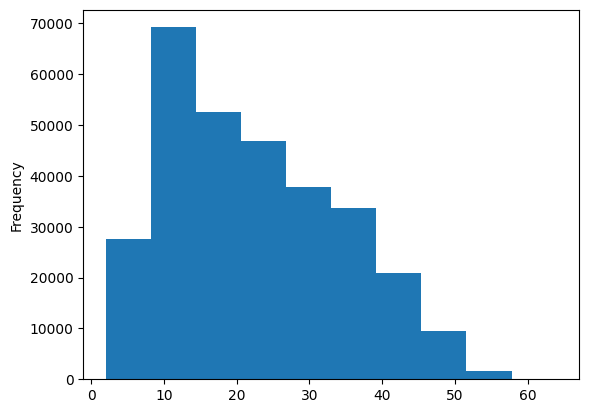

In [ ]:
df['word_count'].plot(kind='hist');     # Provides us the distribution of word_count in the form of histogram

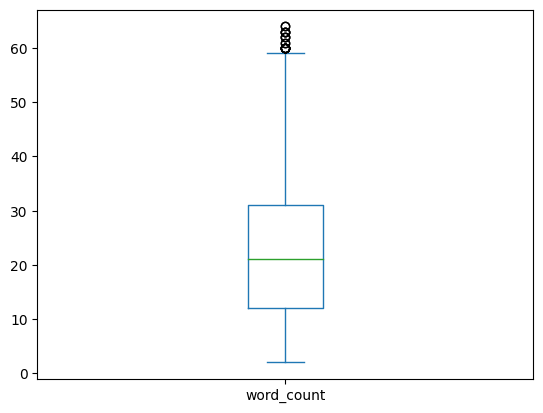

In [ ]:
df['word_count'].plot(kind='box');    # Outlier Detection for 'word_count'

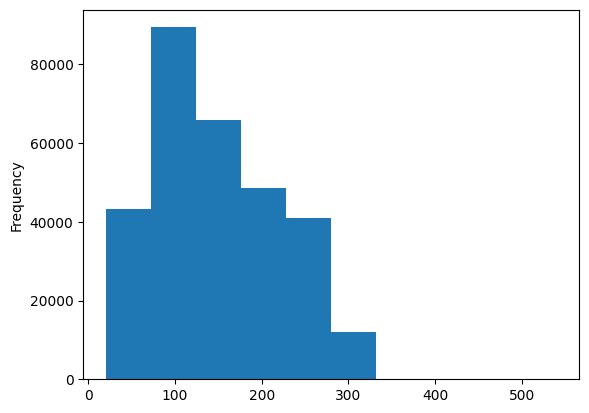

In [ ]:
df['content_len'].plot(kind='hist');    # Distribution of content_len in the form of histogram

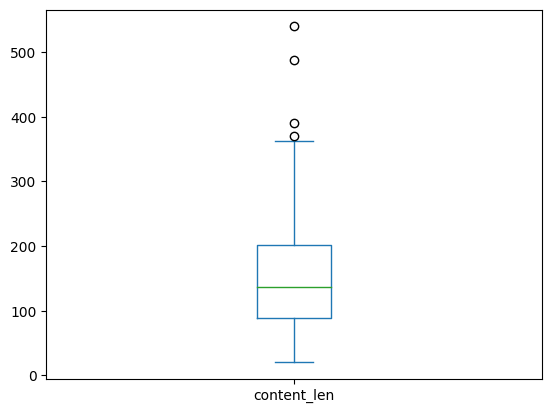

In [ ]:
df['content_len'].plot(kind='box');       # Outlier Detection

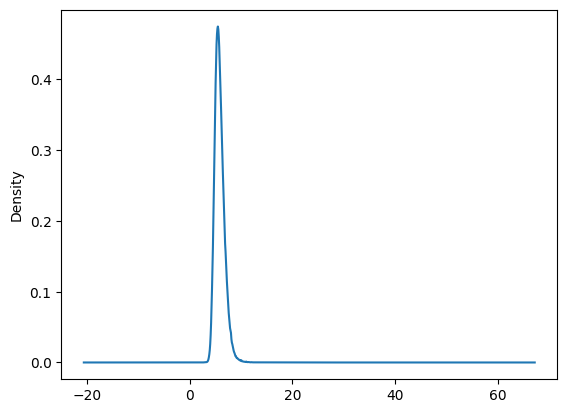

In [ ]:
df['avg_word_len'].plot(kind='kde');    # Normal Distribution of avg_word_len

In [ ]:
df['username'].value_counts()

username
IndependentNGR     32295
CNN                13954
EuroLeague          6226
AMCTheatres         5114
hkfp                4269
                   ...  
BlackShellMedia        1
feraldata              1
MS_ITProCA             1
COTYInc                1
GDLMetro               1
Name: count, Length: 2449, dtype: int64

<Axes: xlabel='username'>

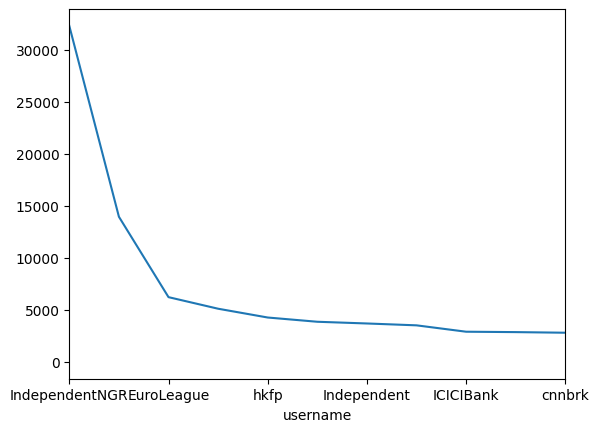

In [ ]:
df['username'].value_counts().plot(xlim=(0,10))         # Shows the count of top10 most occured usernames

In [ ]:
df['inferred company'].value_counts()[:11]

inferred company
independent    39248
cnn            23768
cisco          19309
cbc            15579
free           13456
williams       12604
toyota          9121
amc             8910
mcafee          7923
emerson         7483
aaa             7220
Name: count, dtype: int64

<Axes: xlabel='inferred company'>

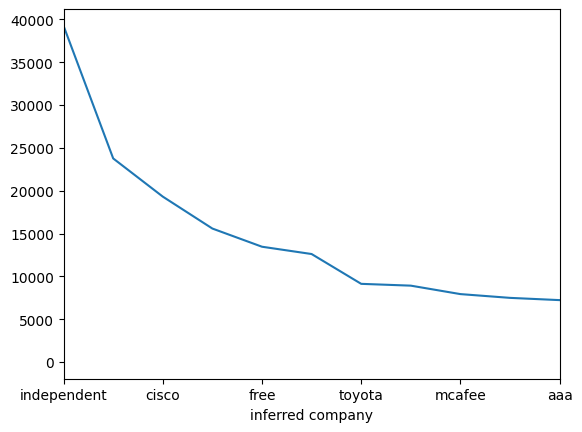

In [ ]:
df['inferred company'].value_counts().plot(xlim=(0,10))       # Shows the count of top10 most occured companies

### UNIGRAM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Creating a Function to get the top n words occuring in the given dataset

def get_uni_top_n_words(x,n):
  vec=CountVectorizer().fit(x)
  bow=vec.transform(x)
  sum_words=bow.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word , idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x : x[1], reverse=True)
  return words_freq[:n]

In [ ]:
words=get_uni_top_n_words(df['content'],50)         # Calling Top 50 words

In [ ]:
words[:10]

[('hyperlink', 466165),
 ('the', 249156),
 ('to', 179013),
 ('mention', 133756),
 ('and', 116782),
 ('of', 109083),
 ('in', 104978),
 ('for', 83339),
 ('on', 67508),
 ('you', 63020)]

In [ ]:
# Creating a DataFrame for plotting
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])

In [ ]:
import plotly.express as px

# Create a line chart
fig = px.line(df1,x='Unigram',y='Frequency',)

# Show the chart
fig.show()

In [ ]:
# Create a bar chart
fig = px.bar(df1,x='Unigram',y='Frequency')

# Show the chart
fig.show()

### BIGRAM

In [ ]:
# Creating a Function for bigrams

def get_bi_top_n_words(x,n):
  vec=CountVectorizer(ngram_range=(2,2)).fit(x)
  bow=vec.transform(x)
  sum_words=bow.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word , idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x : x[1], reverse=True)
  return words_freq[:n]

In [ ]:
bi_words=get_bi_top_n_words(df['content'],50)

In [ ]:
bi_words[:10]       # Top 10 bigram words present

[('hyperlink hyperlink', 134844),
 ('of the', 21426),
 ('in the', 20272),
 ('mention hyperlink', 19524),
 ('mention mention', 19213),
 ('for the', 12256),
 ('on the', 12129),
 ('to the', 11654),
 ('at the', 9087),
 ('we re', 8222)]

In [ ]:
df1=pd.DataFrame(bi_words,columns=['Bigram','Frequency'])

In [ ]:
df1.head()

,Bigram,Frequency
0,hyperlink hyperlink,134844
1,of the,21426
2,in the,20272
3,mention hyperlink,19524
4,mention mention,19213


In [ ]:
# Plotting a bar graph for the bigram vs frequency
fig = px.bar(df1,x='Bigram',y='Frequency')

# Show the chart
fig.show()

### TRIGRAM

In [ ]:
# Creating a Function for trigram words

def get_tri_top_n_words(x,n):
  vec=CountVectorizer(ngram_range=(3,3)).fit(x)
  bow=vec.transform(x)
  sum_words=bow.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word , idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x : x[1], reverse=True)
  return words_freq[:n]

In [ ]:
tri_words=get_tri_top_n_words(df['content'],50)

In [ ]:
tri_words[:10]

[('mention mention mention', 8650),
 ('more hyperlink hyperlink', 5508),
 ('here hyperlink hyperlink', 5080),
 ('mention mention hyperlink', 3942),
 ('mention hyperlink hyperlink', 3529),
 ('learn more hyperlink', 3529),
 ('mention and mention', 3433),
 ('now hyperlink hyperlink', 3324),
 ('one of the', 1982),
 ('learn more about', 1714)]

In [ ]:
# Making a DataFrame for the Trigrams
df1=pd.DataFrame(tri_words,columns=['Trigram','Frequency'])

In [ ]:
df1.head()

,Trigram,Frequency
0,mention mention mention,8650
1,more hyperlink hyperlink,5508
2,here hyperlink hyperlink,5080
3,mention mention hyperlink,3942
4,mention hyperlink hyperlink,3529


In [ ]:
fig = px.bar(df1,x='Trigram',y='Frequency')

# Show the chart
fig.show()

# REMOVING STOPWORDS AND OUTLIERS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_lowercase(text):         # Change all words to lowercase format
  return text.lower()

def remove_punct(text):           # Remove punctuations
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

def remove_whitespace(text):      # Remove any extra spaces in the data
  return " ".join(text.split())

def remove_stopwords(text):       #Remove stopwords like me , you , his, her and many other words present in english language
  word_list=[w for w in text.split() if w not in stopwords]
  return " ".join(word_list)


In [ ]:
# Function used for test cleaning using the above defined functions
def text_cleaning(text):
  text1=text_lowercase(text)
  text2=remove_punct(text1)
  text3=remove_stopwords(text2)
  text4=remove_whitespace(text3)

  return text4

In [ ]:
# Making a new Content column constisting of clean data after the text cleaning
df['cleaned_content']=df['content'].apply(lambda x : text_cleaning(x))

In [ ]:
df.head()

,date,likes,content,username,media,inferred company,content_len,word_count,avg_word_len,cleaned_content
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,181,29,5.275862,spend weekend morning ham egg cheese wrap pair...
1,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,73,10,6.400000,watch rapper mention freestyle hour hyperlink ...
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,104,14,6.500000,canadian armenian community demands ban milita...
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,140,22,5.409091,1st europe devastated covid19 italy redoubled ...
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,199,26,6.692308,congratulations pauletha butts mention present...


# Unigram, Bigram and trigram for cleaned_content

### UNIGRAM

In [ ]:
words=get_uni_top_n_words(df['cleaned_content'],50)

In [ ]:
words[:10]

[('hyperlink', 465597),
 ('mention', 130948),
 ('new', 24001),
 ('amp', 19819),
 ('get', 18731),
 ('us', 17586),
 ('today', 12946),
 ('one', 12712),
 ('learn', 11998),
 ('time', 11352)]

In [ ]:
def remove_outliers(text):
  outliers=['hyperlink','mention']
  word_list=[w for w in text.split() if w not in outliers]
  return " ".join(word_list)


In [ ]:
df['cleaned_content']= df['cleaned_content'].apply(lambda x : remove_outliers(x))

In [ ]:
words=get_uni_top_n_words(df['cleaned_content'],50)
words[:5]

[('new', 24001),
 ('amp', 19819),
 ('get', 18731),
 ('us', 17586),
 ('today', 12946)]

In [ ]:
# Creating a DataFrame for plotting Unigram of cleaned content
df1=pd.DataFrame(words,columns=['Unigram','Frequency'])

In [ ]:
# Create a bar chart
fig = px.bar(df1,x='Unigram',y='Frequency')

# Show the chart
fig.show()

### BIGRAM

In [ ]:
bi_words=get_bi_top_n_words(df['cleaned_content'],50)

In [ ]:
bi_words[:10]

[('we re', 3997),
 ('join us', 2667),
 ('president trump', 2327),
 ('you re', 1779),
 ('hong kong', 1585),
 ('chance win', 1508),
 ('make sure', 1353),
 ('get tickets', 1288),
 ('we ve', 1275),
 ('joe biden', 1260)]

In [ ]:
# Creating a DataFrame for plotting Bigram of cleaned content
df1=pd.DataFrame(bi_words,columns=['Bigram','Frequency'])

In [ ]:
# Create a bar chart
fig = px.bar(df1,x='Bigram',y='Frequency')

# Show the chart
fig.show()

### TRIGRAM

In [ ]:
words=get_tri_top_n_words(df['cleaned_content'],50)

In [ ]:
words[:10]

[('hongkong hongkongprotests antielab', 490),
 ('let us know', 353),
 ('stand chance win', 342),
 ('follow live updates', 295),
 ('using icici bank', 294),
 ('we ve got', 284),
 ('photo stand news', 280),
 ('using icicibank cards', 258),
 ('we re proud', 253),
 ('hongkongprotests antielab china', 237)]

In [ ]:
# Creating a DataFrame for plotting trigram
df1=pd.DataFrame(words,columns=['Trigram','Frequency'])

In [ ]:
# Create a bar chart
fig = px.bar(df1,x='Trigram',y='Frequency')

# Show the chart
fig.show()

## BIVARIATE ANALYSIS

In [ ]:
# Relation b/w Word count vs likes
mean_df1 = df.groupby(['word_count'])['likes'].mean().sort_values(ascending=False)

# Create a bar chart
fig = px.bar(mean_df1)

# Show the chart
fig.show()

In [ ]:
# Company vs likes count
mean_df1 = df.groupby(['inferred company'])['likes'].mean().sort_values(ascending=False).head(10)

# Create a bar chart
fig = px.bar(mean_df1)

# Show the chart
fig.show()

In [ ]:
# Username vs likes count

mean_df1 = df.groupby(['username'])['likes'].mean().sort_values(ascending=False).head(15)
# Create a bar chart
fig = px.bar(mean_df1)

# Show the chart
fig.show()

## Updating Content_len and word_count on basis of cleaned_content

In [ ]:
df['content_len']=df['cleaned_content'].apply(lambda x: len(x))

In [ ]:
df['word_count']=df['cleaned_content'].apply(lambda x: len(x.split()))

In [ ]:
df[df['word_count']==0]       # Check rows with 0 word count

,date,likes,content,username,media,inferred company,content_len,word_count,avg_word_len,cleaned_content
243,2019-12-04 08:57:34,185,From <mention>: <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.333333,
4312,2018-06-04 19:40:02,74,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
5583,2018-06-03 23:52:24,111,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
5877,2018-05-31 11:00:00,250,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
6253,2018-06-05 22:35:47,218,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
...,...,...,...,...,...,...,...,...,...,...
294333,2018-06-05 01:36:55,101,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
294366,2020-06-09 14:32:44,99,This is the why. <hyperlink>,ArlanWasHere,[Photo(previewUrl='https://pbs.twimg.com/media...,free,0,0,4.800000,
296914,2018-06-08 16:37:15,38,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,
298056,2018-06-04 21:46:52,41,From <mention> <hyperlink>,officialmcafee,[Photo(previewUrl='https://pbs.twimg.com/media...,mcafee,0,0,8.000000,


In [ ]:
df = df[df['word_count']!=0]        # Remove rows with 0 word count

In [ ]:
# Final updated cleaned DataFrame
df

,date,likes,content,username,media,inferred company,content_len,word_count,avg_word_len,cleaned_content
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,124,19,5.275862,spend weekend morning ham egg cheese wrap pair...
1,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,27,4,6.400000,watch rapper freestyle hour
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,74,10,6.500000,canadian armenian community demands ban milita...
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,79,11,5.409091,1st europe devastated covid19 italy redoubled ...
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,142,15,6.692308,congratulations pauletha butts presented beyon...
...,...,...,...,...,...,...,...,...,...,...
299995,2019-09-07 16:18:10,0,Barcelona Star Expected To Return Against Vale...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,39,5,7.333333,barcelona star expected return valencia
299996,2018-02-23 11:24:36,46,Kjeld Nuis of #NED is golden again... This tim...,CBCOlympics,[Video(thumbnailUrl='https://pbs.twimg.com/med...,cbc,95,16,4.629630,kjeld nuis ned golden time mens 1000m beating ...
299997,2020-11-11 20:18:15,261,Grateful 🙌🏾 to have <mention> officially join ...,TeamCoachBuzz,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,29,5,6.100000,grateful 🙌🏾 officially join 🔥
299998,2019-10-29 10:44:00,119,The US Air Force's mysterious space plane just...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/med...,independent,84,14,4.464286,us air forces mysterious space plane landed re...


In [ ]:
# Updating the avg_word_len
df['avg_word_len']=df['cleaned_content'].apply(lambda x: get_avg_word_len(x))

In [ ]:
df.describe()

,likes,content_len,word_count,avg_word_len
count,299716.000000,299716.000000,299716.000000,299716.000000
mean,773.545957,91.450360,12.983838,6.114515
std,4932.782463,50.536663,6.950958,1.182457
min,0.000000,1.000000,1.000000,1.000000
25%,3.000000,51.000000,7.000000,5.400000
50%,76.000000,82.000000,12.000000,6.055556
75%,365.000000,127.000000,18.000000,6.750000
max,560193.000000,273.000000,57.000000,162.000000


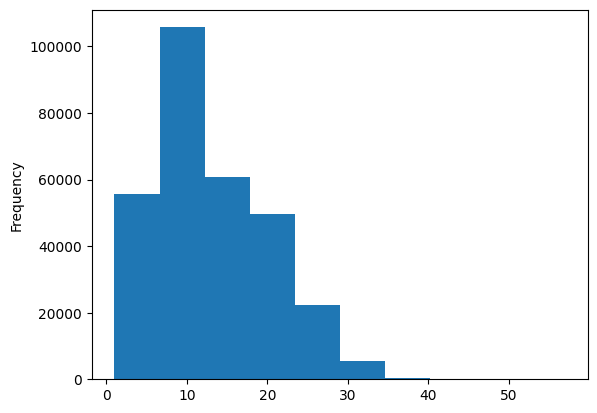

In [ ]:
# Updated histogram for word_count
df['word_count'].plot(kind='hist');

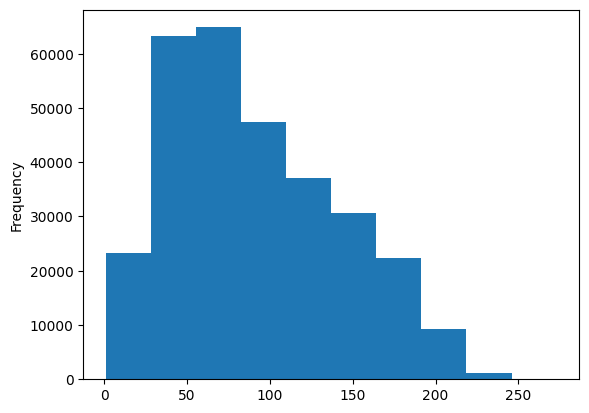

In [ ]:
# Updated histogram for content_len
df['content_len'].plot(kind='hist');

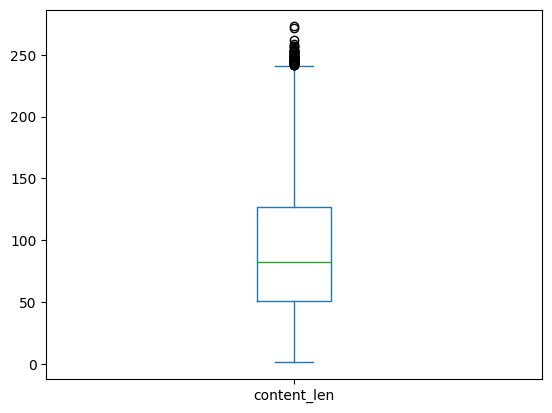

In [ ]:
df['content_len'].plot(kind='box');     # Checking for Outlier detection

In [ ]:
df.head()

,date,likes,content,username,media,inferred company,content_len,word_count,avg_word_len,cleaned_content
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,124,19,5.578947,spend weekend morning ham egg cheese wrap pair...
1,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,27,4,6.000000,watch rapper freestyle hour
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,74,10,6.500000,canadian armenian community demands ban milita...
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,79,11,6.272727,1st europe devastated covid19 italy redoubled ...
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,142,15,8.533333,congratulations pauletha butts presented beyon...


In [ ]:
df['media_type'] = df['media'].str.extract(r"\[([A-Za-z]+)\(")

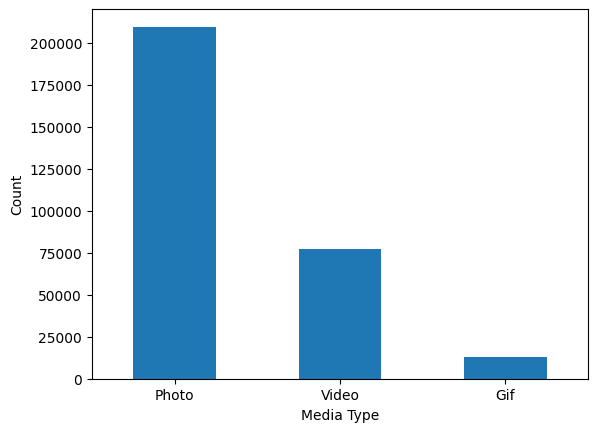

In [ ]:
# Compute frequency counts for 'media_type'
media_counts = df['media_type'].value_counts()

# Plot the bar plot
df['media_type'].value_counts().plot(kind="bar",xlabel="Media Type",ylabel="Count",rot="horizontal");

In [ ]:
# Username vs likes count

mean_df1 = df.groupby(['media_type'])['likes'].mean().sort_values(ascending=False).head(15)
# Create a bar chart
fig = px.bar(mean_df1)

# Show the chart
fig.show()

In [ ]:
df=df.drop('content',axis=1)

In [ ]:
df.head()

,date,likes,username,media,inferred company,content_len,word_count,avg_word_len,cleaned_content,media_type
0,2020-12-12 00:47:00,1,TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,124,19,5.578947,spend weekend morning ham egg cheese wrap pair...,Photo
1,2018-06-30 10:04:20,2750,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,27,4,6.000000,watch rapper freestyle hour,Photo
2,2020-09-29 19:47:28,57,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,74,10,6.500000,canadian armenian community demands ban milita...,Photo
3,2020-10-01 11:40:09,152,MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,79,11,6.272727,1st europe devastated covid19 italy redoubled ...,Photo
4,2018-10-19 14:30:46,41,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,142,15,8.533333,congratulations pauletha butts presented beyon...,Photo


In [ ]:
df.describe()

,likes,content_len,word_count,avg_word_len
count,299716.000000,299716.000000,299716.000000,299716.000000
mean,773.545957,91.450360,12.983838,6.114515
std,4932.782463,50.536663,6.950958,1.182457
min,0.000000,1.000000,1.000000,1.000000
25%,3.000000,51.000000,7.000000,5.400000
50%,76.000000,82.000000,12.000000,6.055556
75%,365.000000,127.000000,18.000000,6.750000
max,560193.000000,273.000000,57.000000,162.000000
